EJERCICIO 1: IMPLEMENTACIÓN TRANSFORMADA DISCRETA DE FOURIER

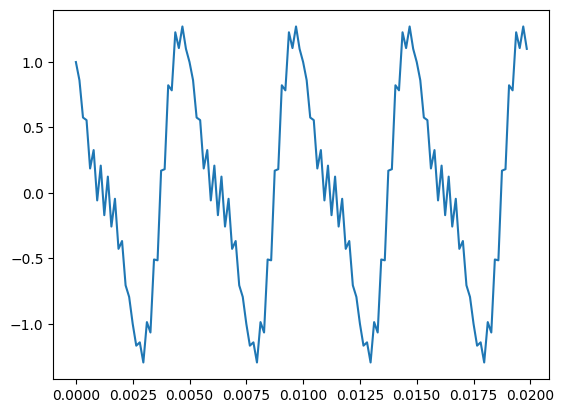

--------------------------------------


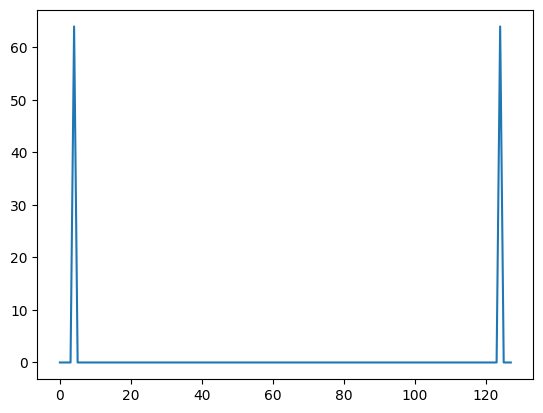

--------------------------------------


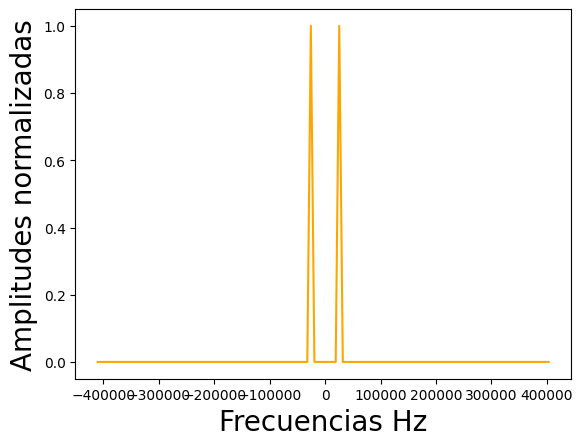

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, fftfreq

# Construcción de la señal
N = 128 # number of point in the whole interval
f = 200.0 #  frequency in Hz
dt = 1 / (f * 32 ) #32 samples per unit frequency
t = np.linspace( 0, (N-1)*dt, N)
y = np.cos(2 * np.pi * f * t) - 0.4 * np.sin(2 * np.pi * (2*f) * t )+ 0.17*np.sin(2 * np.pi * (15*f) * t )

# 1) implemente de la transformada de fourier discreta

#print(len(y),y)
plt.plot(t,y)
plt.show()

n= np.arange(len(y))
#print(n)

x_k=[]
for k in range(len(y)):
  x_k.append( np.sum( y*np.exp((-1*1j* 2*np.pi* k * n )/ N))   )
  #print(np.exp(-1*1j* 2*np.pi* k * n )/ N)

#print("X_K", len(x_k), x_k[100])
x_k_real = np.real(x_k)
#print(x_k_real)
print("--------------------------------------")

arregloK=np.arange(len(x_k))
plt.plot(arregloK, x_k_real)
plt.show()

# 2) Genere el arreglo de las frecuencias (ver documentación de fftfreq):

print("--------------------------------------")
arregloK = np.arange(-len(y)/2 , len(y)/2 )
#print(len(arregloK),arregloK)
arregloK = arregloK  / dt  #tendra unidades de 1/s (Hz)

x_k_real = np.array(x_k_real)
o=len(x_k_real)/2
o=int(len(x_k_real)/2)

#print(len(x_k_real[:o]), x_k_real[:o])
#print(len(x_k_real[o:]), x_k_real[o:])

x_k_realNormalizadoCortado = np.zeros(len(x_k_real))
x_k_realNormalizadoCortado[:o] =  x_k_real[o:]
x_k_realNormalizadoCortado[o:] =  x_k_real[:o]
x_k_realNormalizadoCortado /= np.max(x_k_realNormalizadoCortado)

plt.plot(arregloK, x_k_realNormalizadoCortado / np.max(x_k_realNormalizadoCortado) , color="orange" )
plt.xlabel("Frecuencias Hz", size=20)
plt.ylabel("Amplitudes normalizadas", size=20)
plt.show()



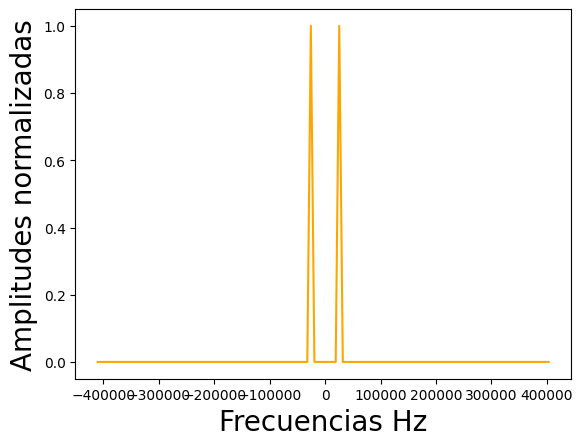

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


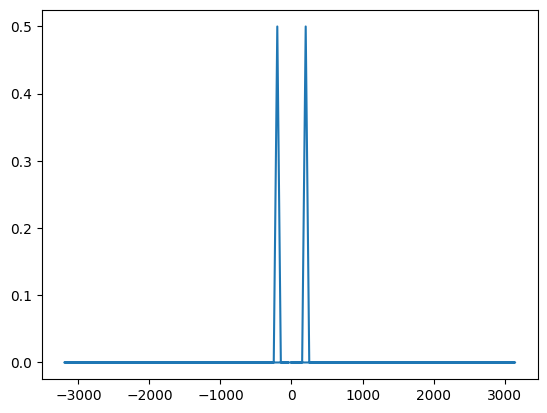

In [ ]:
# 3) Haga una gráfica comparando método propio con implementación de scipy.fftpack.fft
plt.plot(arregloK, x_k_realNormalizadoCortado / np.max(x_k_realNormalizadoCortado) , color="orange" )
plt.xlabel("Frecuencias Hz", size=20)
plt.ylabel("Amplitudes normalizadas", size=20)
plt.show()

fft_x = fft(y) / N # FFT Normalized
freq = fftfreq(N, dt) # Recuperamos las frecuencias
plt.plot(freq , fft_x)

EJERCICIO 2: FILTRO DE FOURIER

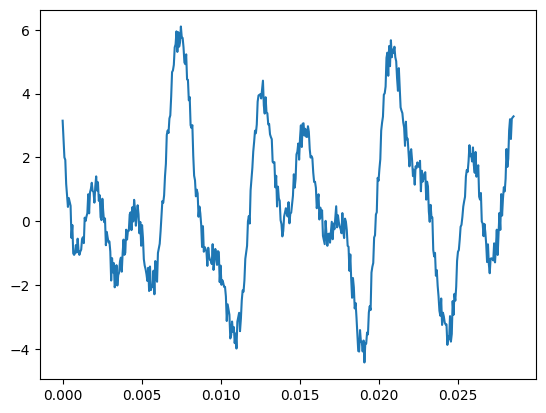

------------------------------TRANSFORMADA DE FOURIER------------------------------


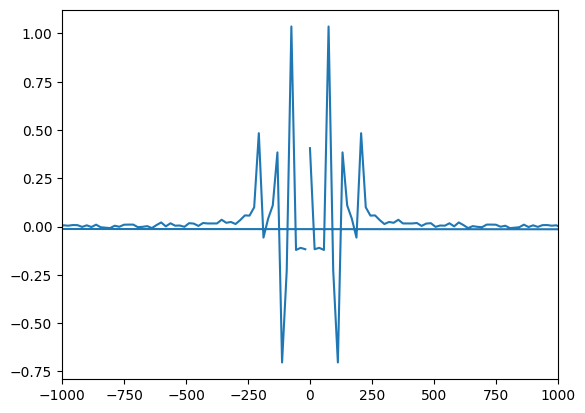

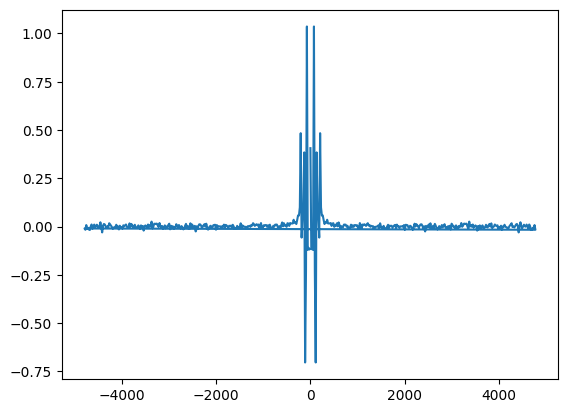

------------------------------ Filtro Pasa Bajos es frecuencias Bajas ------------------------------
De manera cualitativa decido cortar la transformada en intervalo (-400 , 400)
Noto que este vector de frecuencias está definido primero los valores positivos, y luego los negativos, luego debe ser cortado de una forma particular


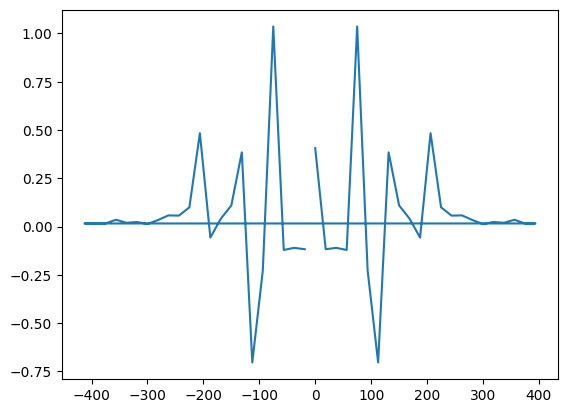

-------------------------------- AHORA HAY QUE HACER FOURIER INVERSA ----------------------------


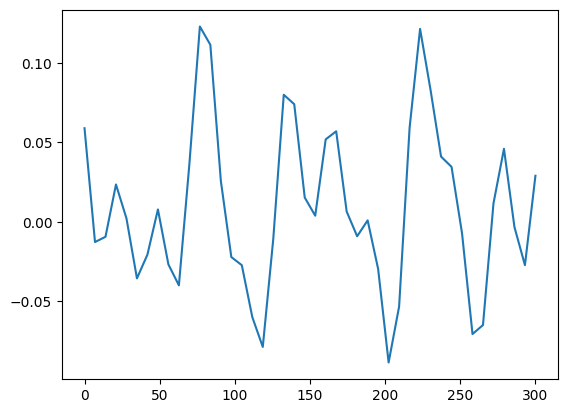

 Me quedó un filtro bastante precario :L tengo varias dudas sobre la teoria de fourier y saber con exactitud qué hacen las funciones fft y fftfreq
 pero por temas de tiempo no he podido ingadar con detalle y calma la documentacion


In [84]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, fftfreq
pi=np.pi

# 1) Almacene los datos de signal.dat. La columna 1 es el tiempo y la columna 2 es su señal f(t).
#Grafique su señal en función del tiempo.

#raw_signal = plt.pyplot.imread("signal.dat")
raw_signal = np.loadtxt('signal.dat', delimiter = "," )
#print(raw_signal)
#print(len(raw_signal), len(raw_signal[0]) ,raw_signal[100])

tiempo_signal = raw_signal[:,0]
senal_signal = raw_signal[:,1]

plt.plot(tiempo_signal, senal_signal)
plt.show()

# 2) Use fftfreq (BONO si usa su implementación propia) y haga una gráfica de su transformada de fourier en función de las frecuencias.

print("------------------------------TRANSFORMADA DE FOURIER------------------------------")
N2 = 512
f2 = 300.0
dt2 = 1 / (f2 * 32 )

fft_x2 = fft(senal_signal) / N2  #DIMENSION DE 512
freq = fftfreq(N2, dt2)
plt.plot(freq , fft_x2)
plt.xlim(-1000,1000)
plt.show()

plt.plot(freq , fft_x2)
#plt.xlim(-4500,4500)
plt.show()

# 3) Haga un filtro pasa bajos que le permita filtrar el ruido de la señal del punto 1. #
#Use la gráfica de la transformada de fourier del punto 3 para determinar un valor apropiado de la frecuencia de corte que debe usar para filtrar dicho ruido de alta frecuencia.
print("------------------------------ Filtro Pasa Bajos es frecuencias Bajas ------------------------------")
print("De manera cualitativa decido cortar la transformada en intervalo (-400 , 400)")
print("Noto que este vector de frecuencias está definido primero los valores positivos, y luego los negativos, luego debe ser cortado de una forma particular")

freq_fil1 = freq[0:22]
freq_fil2 = freq[-22:]
freq_filtrada = np.concatenate(( freq_fil1 , freq_fil2))
#print(len(freq_filtrada), freq_filtrada)

fft_x21 = fft_x2[0:22]
fft_x22 = fft_x2[-22:]
fft_x2_filtrada = np.concatenate(( fft_x21 , fft_x22))

plt.plot(freq_filtrada ,fft_x2_filtrada )
plt.show()

# 4) Grafique la señal filtrada
print("-------------------------------- AHORA HAY QUE HACER FOURIER INVERSA ----------------------------")

senal_tiempo_filtrada = np.fft.ifft(fft_x2_filtrada)
num=len(freq_filtrada)
tiempo_senal_filtrado = np.linspace(0, f2, num)

plt.plot(tiempo_senal_filtrado , senal_tiempo_filtrada)
plt.show()

print(" Me quedó un filtro bastante precario :L tengo varias dudas sobre la teoria de fourier y saber con exactitud qué hacen las funciones fft y fftfreq")
print(" pero por temas de tiempo no he podido ingadar con detalle y calma la documentacion")

EJERCICIO 3: FILTROS VIOLIN-TROMPETA (OPCIONAL)

(44100, array([  18,  -12,  -35, ..., -130, -141, -137], dtype=int16))
esto quiere decir que la frecuencia de los datos es 44100 Hz
163314


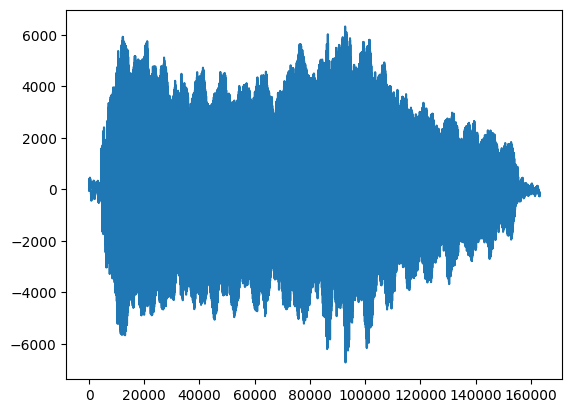

------------------------------TRANSFORMADA DE FOURIER------------------------------


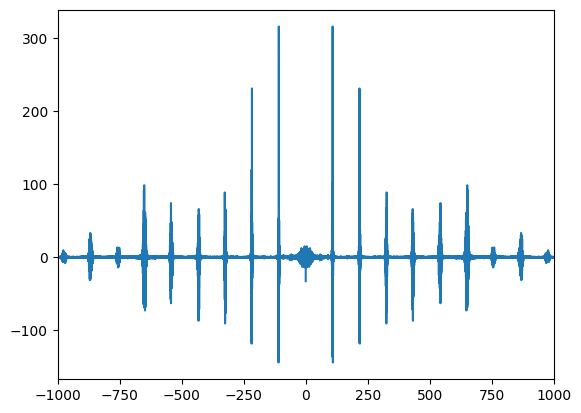

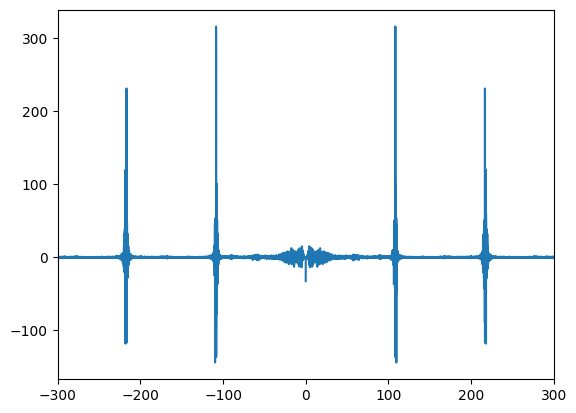

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft, fftfreq
import scipy
import scipy.io
from scipy.io import wavfile

# 1) Almacene los datos de violin.wav (use wav.read('violin.wav')).
#Grafique su señal en función del tiempo y guarde dicha gráfica.

raw_violin = wavfile.read('violin.wav')
print(raw_violin)
print("esto quiere decir que la frecuencia de los datos es 44100 Hz")

datos_violin = raw_violin[1]
print(len(datos_violin))

tiempo3 = np.arange(0, 163314, 1)

plt.plot(tiempo3  , datos_violin)
plt.show()

# 2) Use fftfreq (BONO si usa su implementación propia) y haga una gráfica de su transformada de fourier en función de las frecuencias.

print("------------------------------TRANSFORMADA DE FOURIER------------------------------")
N3 = 163314
f3 = 300.0
dt3 = 1 / (f3 * 32 )

fft_x3 = fft(datos_violin) / N3
freq = fftfreq(N3, dt3)
plt.plot(freq , fft_x3)
plt.xlim(-1000,1000)
plt.show()

plt.plot(freq , fft_x3)
plt.xlim(-300,300)
plt.show()

# 3) Haga un filtro que elimine el pico principal. Grafique su señal filtrada.
#Escuche (OJO con el volumen!) sus datos filtrados.
#Repita lo anterior haciendo un filtro pasaaltos y uno pasabajos.

#NOTA: para el manejo de archivos .wav mire la documentacion de python de input-output en https://docs.scipy.org/doc/scipy-0.14.0/reference/io.html)

# 4) repita lo anterior para trumpet.wav que es la señal correspondiente al sonido de una trompeta tocando la misma nota que el violín del puntos anterior.


EJERCICIO 4: FILTRO RUIDO PERIÓDICO IMAGEN 2D

[[ 8 11 13 ... 24 24 25]
 [10  9  9 ... 24 24 25]
 [ 7  7  7 ... 24 25 25]
 ...
 [27 32 37 ... 27 27 27]
 [36 37 38 ... 27 27 27]
 [33 28 28 ... 27 27 27]]


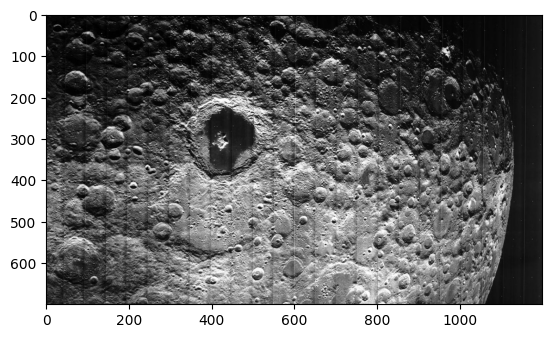

In [28]:
import numpy as np
import matplotlib as plt
from scipy.fftpack import fft, fftfreq

# 1) Almacene los datos de la imagen (use imread: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)

imagen_pixel = plt.pyplot.imread("moon.jpg")
print(imagen_pixel)

plt.pyplot.imshow(imagen_pixel, cmap="gray")





AxesImage(size=(700, 1200))
QUIERO ESTA INFORMACION max 70184223.0 min -14024897.599307764
700
1200
tamaño de la imagen en pixel AxesImage(size=(700, 1200))
--con esto entiendo que es una matriz de 700 x 1200 que contiene numeros complejos, la posicion de la matriz es la posicion del pixel y np.real su magnitud es el valor del pixel que viene a ser el eje z--
ademas, el valor min es -14 millones y el maximo de 70 millones
yo personalmente no veo ningun patron en esta imagen, me parece ruido blanco, seguramente hay tecnicas de análisis para encontrar patrones
pero si la actividad es de manera cualitativa no encuentro cualidades por inspección que me definan un criterio de filtro


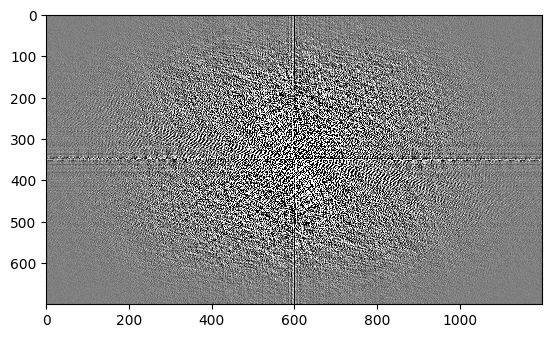

In [53]:
# 2) Use la librería de scipy de transformada de fourier en 2d y la trasnformada inversa
#(https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft2.html)
#para hacer un código que filtre el ruido periodico que tiene la imagen de la luna.
#2a) haga una imagen de la luna para revisar que los datos están bien almacenados
#2b) haga también una imágen de la transformada de foruirer de la imagen

#NOTA: las gráficas que mostré en clase de la transformada de Fourier de la imagen de la luna
#las hice usando los siguientes parámetros en imshow():
#plt.imshow(np.real(Transformadadefourierdelaimagen), cmap=cm.gray, vmin =0, vmax=200.)

import scipy
from scipy.fftpack import fft, fftshift
import matplotlib as plt

f_DeLaMatriz = scipy.fft.fft2(imagen_pixel)   #SE HACE TRANSFORMADA DE FOURIER
#print(f_DeLaMatriz)

f_DeLaMatrizFrecuencias = fftshift(f_DeLaMatriz)    #SE APLICA LA FUNCIÓN SHIFT

esto2 = plt.pyplot.imshow(np.real(f_DeLaMatrizFrecuencias), cmap="gray", vmin=-5000, vmax=5000)      #SE GRAFICA TENIENDO EN CUENTA QUE HAY VALORES EN Z MUY GRANDES QUE OPACAN LA IMAGEN
print(esto2)
print("QUIERO ESTA INFORMACION", "max", np.max(np.real(f_DeLaMatrizFrecuencias)), "min" ,np.min(np.real(f_DeLaMatrizFrecuencias)))
print(len(f_DeLaMatrizFrecuencias))
print(len(f_DeLaMatrizFrecuencias[0]))
print("tamaño de la imagen en pixel", np.max(esto2))
print("--con esto entiendo que es una matriz de 700 x 1200 que contiene numeros complejos, la posicion de la matriz es la posicion del pixel y np.real su magnitud es el valor del pixel que viene a ser el eje z--")
print("ademas, el valor min es -14 millones y el maximo de 70 millones")
print("yo personalmente no veo ningun patron en esta imagen, me parece ruido blanco, seguramente hay tecnicas de análisis para encontrar patrones")
print("pero si la actividad es de manera cualitativa no encuentro cualidades por inspección que me definan un criterio de filtro")



---POR LO TANTO, el criterio que voy a aplicar es quitar las frecuencias que estan cercanas a los ejes donde percibo unas lineas---
la operacion se realiza sobre la transformada SIN FFTSHIFT, y asi se trata de elimintar los bordes


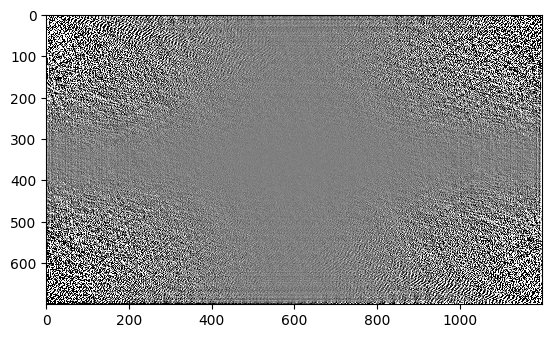

In [68]:
#2c) haga una imagen que muestre las transformada de fourier después del filtro

print("---POR LO TANTO, el criterio que voy a aplicar es quitar las frecuencias que estan cercanas a los ejes donde percibo unas lineas---")
plt.pyplot.imshow(np.real(f_DeLaMatriz), cmap="gray", vmin=-5000, vmax=5000)

print("la operacion se realiza sobre la transformada SIN FFTSHIFT, y asi se trata de elimintar los bordes")



filas 700 columnas 1200
(4079.7873410827306-2752.866113996498j)


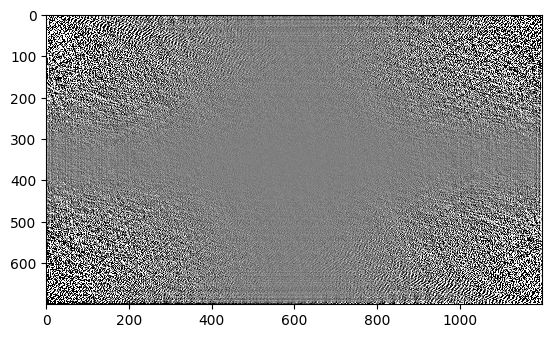

In [76]:
matriz_filtrada = np.copy(f_DeLaMatriz)
print("filas",len(matriz_filtrada) ,"columnas", len(matriz_filtrada[0]))
corte= 5                                                 #NUMERO DE FILAS AL CORTAR
columnas_filtradas =    np.concatenate(( np.arange(0,corte) , np.arange(1200-corte,1200) ))
filas_filtradas =    np.concatenate(( np.arange(0,corte) , np.arange(700-corte,700) ))

print(matriz_filtrada[500][700])

for i in (filas_filtradas):
  for j in (columnas_filtradas):
    matriz_filtrada[i][j] = 0

plt.pyplot.imshow(np.real(matriz_filtrada), cmap="gray", vmin=-5000, vmax=5000)


[[-12.68081841-2.15022589j  -9.81857988-2.1593387j
   -7.9589159 -2.16594079j ...   3.71628812-2.10802281j
    3.58668774-2.12454627j   4.454295  -2.13862147j]
 [-10.62773672-1.9988466j  -11.76430845-2.00645021j
  -11.90337444-2.01158079j ...   3.76629976-1.96139265j
    3.63763782-1.97629663j   4.506269  -1.98878862j]
 [-13.57512705-1.84903202j -13.71045888-1.85517902j
  -13.84820442-1.85889179j ...   3.81569067-1.81617611j
    4.68801643-1.82950986j   4.55772111-1.840469j  ]
 ...
 [  6.15653998-2.61139782j  11.01552421-2.62532266j
   15.87169511-2.63663058j ...   6.5619257 -2.55413577j
    6.42981793-2.57578118j   6.29466379-2.59487656j]
 [ 15.21138141-2.45674024j  16.07139667-2.46901692j
   16.92867779-2.47871091j ...   6.614166  -2.40462321j
    6.48284161-2.4245207j    6.34855507-2.44190089j]
 [ 12.26557395-2.30293617j   7.12667437-2.31360774j
    6.98512026-2.32173202j ...   6.66559774-2.25584217j
    6.53510949-2.27403121j   6.40174377-2.28973689j]]


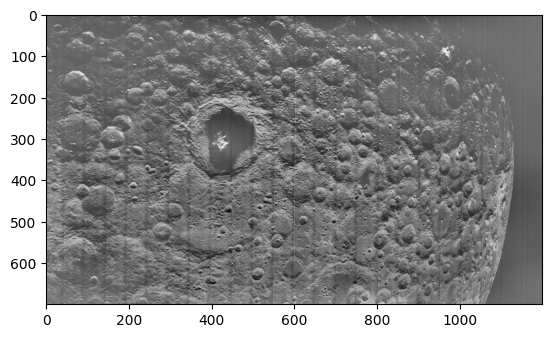

In [79]:
#3) haga una gráfica de la imagen filtrada y guárdela en LunaFiltrada.png

#imagen: https://blogs.3ds.com/simulia/wp-content/uploads/sites/18/2019/07/NASA_Moon.jpg

luna_filtrada = scipy.fft.ifft2(matriz_filtrada)  #TRANSFORMADA DE FOURIER INVERSA EN DOS DIMENSIONES
print(luna_filtrada)

plt.pyplot.imshow(np.real(luna_filtrada), cmap="gray")

EJERCICIO 5: FASE Y MAGNITUD

[[ 0.          0.16908689 -0.25751612 ... -2.24964947  0.25751612
  -0.16908689]
 [-2.11062412 -0.78286631  0.82082052 ... -1.74874466  2.37335451
  -0.19583672]
 [ 0.10055091  2.22679292  0.97522365 ... -1.342763   -0.29009286
   3.09222204]
 ...
 [ 0.34312545 -2.64638632 -2.9988506  ...  1.55236988  1.22753494
   2.84224598]
 [-0.10055091 -3.09222204  0.29009286 ...  1.71374907 -0.97522365
  -2.22679292]
 [ 2.11062412  0.19583672 -2.37335451 ...  1.13683303 -0.82082052
   0.78286631]]
-----------fase de la foto--------------
QUIERO ESTA INFORMACION max 3.1415880242664356 min -3.1415880242664356
314
373


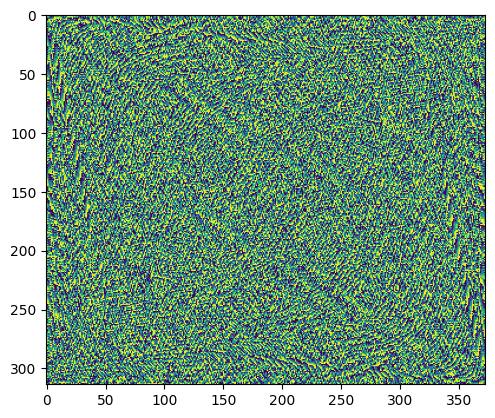

In [110]:
#Recupere la imagen original a partir de la fase y la amplitud de la transformada de fourier (archivos amplitude.dat y phase.dat).
import numpy as np
import matplotlib as plt
from scipy.fftpack import fft, fftfreq

raw_phase = np.loadtxt('phase.dat', delimiter = " " )
print(raw_phase)

print("-----------fase de la foto--------------")
plt.pyplot.imshow(raw_phase, vmin = -2, vmax = 2)


print("QUIERO ESTA INFORMACION", "max", np.max(np.real(raw_phase)), "min" ,np.min(np.real(raw_phase)))
print("filas",len(raw_phase))
print("columnas",len(raw_phase[0]))

#Recuerde que la transformada de fourier tiene una parte real y una imaginaria
#y recuerde tambien que un numero complejo se puede escribir a partir de la fase y la magnitud que son los datos que usted tiene
#(http://webpages.ursinus.edu/lriley/ref/complex/node1.html)


#1)Descargue los datos de fase y magnitud
#2) construya la transformada de fourier
#3) Obtenga la imagen haciendo la transformada inversa


[[25934035.           408217.24155119   306412.5459231  ...
     76032.3250384    306412.5459231    408217.24155119]
 [ 1146634.87555076   636045.10589553   406043.62428084 ...
    264600.40044871    56144.86064899   166962.94982573]
 [  213296.28185349   474890.74550178    50306.51864521 ...
    113172.3004543    414227.96319131   514642.55332138]
 ...
 [  814867.651033     216391.11181206   416257.33661222 ...
    166389.11628586   240431.22842324   445095.86083886]
 [  213296.28185349   514642.55332138   414227.96319131 ...
    122899.12706702    50306.51864521   474890.74550178]
 [ 1146634.87555076   166962.94982573    56144.86064899 ...
    203159.14583182   406043.62428084   636045.10589553]]
------------Magnitud de la foto----------------
QUIERO ESTA INFORMACION max 25934035.0 min 20.15884506794714
filas 314
columnas 373


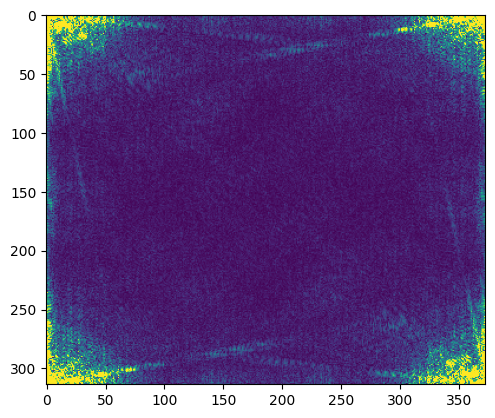

In [113]:

raw_magnitude = np.loadtxt('magnitude.dat', delimiter = " " )
print(raw_magnitude)

print("------------Magnitud de la foto----------------")
plt.pyplot.imshow(raw_magnitude, vmin= 20, vmax= 100000)

print("QUIERO ESTA INFORMACION", "max", np.max(np.real(raw_magnitude)), "min" ,np.min(np.real(raw_magnitude)))
print("filas", len(raw_magnitude))
print("columnas",len(raw_magnitude[0]))

las dos matrices phase and magnitude tienen 314 filas con 373 columnas
las dos son matrices de numeros reales
ESTABA ESPERANDO LA IMAGEN DE LA LUNA :p


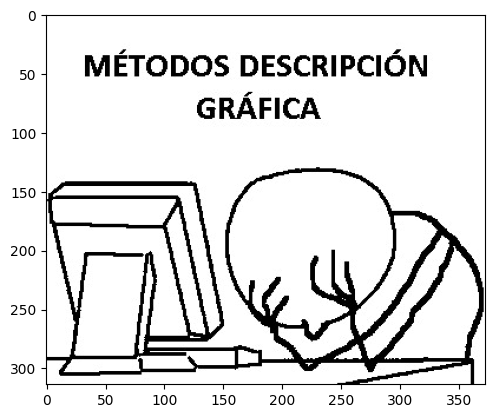

In [125]:
print("las dos matrices phase and magnitude tienen 314 filas con 373 columnas")
print("las dos son matrices de numeros reales")

import scipy
from scipy.fftpack import fft, fftshift
import matplotlib as plt

transformada_inversa = raw_magnitude * np.exp(1j * raw_phase)      #JUNTAR LA MAGNITUD Y LA FASE CON A*EXP(J*PHASE)
imagen_original = abs(scipy.fft.ifft2(transformada_inversa))

plt.pyplot.imshow(imagen_original, cmap = "gray")


print("ESTABA ESPERANDO LA IMAGEN DE LA LUNA :p")